In [19]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


df = pd.read_csv("../../data/round3.csv", delimiter= ";")
df.head(20)


,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,2,0,PICNIC_BASKET2,30094.0,16.0,30093.0,30.0,NaN,NaN,30099,2,30100.0,44.0,NaN,NaN,30096.5,0.000
1,2,0,VOLCANIC_ROCK_VOUCHER_9750,469.0,16.0,NaN,NaN,NaN,NaN,470,16,NaN,NaN,NaN,NaN,469.5,0.000
2,2,0,RAINFOREST_RESIN,9992.0,33.0,NaN,NaN,NaN,NaN,10008,33,NaN,NaN,NaN,NaN,10000.0,0.000
3,2,0,VOLCANIC_ROCK_VOUCHER_9500,718.0,16.0,NaN,NaN,NaN,NaN,719,16,NaN,NaN,NaN,NaN,718.5,0.000
4,2,0,VOLCANIC_ROCK,10218.0,148.0,10217.0,61.0,NaN,NaN,10219,148,10220.0,61.0,NaN,NaN,10218.5,0.000
5,2,0,SQUID_INK,1799.0,28.0,NaN,NaN,NaN,NaN,1802,27,NaN,NaN,NaN,NaN,1800.5,0.000
6,2,0,VOLCANIC_ROCK_VOUCHER_10250,63.0,16.0,NaN,NaN,NaN,NaN,64,16,NaN,NaN,NaN,NaN,63.5,0.000
7,2,0,KELP,2044.0,28.0,NaN,NaN,NaN,NaN,2047,27,NaN,NaN,NaN,NaN,2045.5,0.000
8,2,0,DJEMBES,13419.0,72.0,NaN,NaN,NaN,NaN,13420,72,NaN,NaN,NaN,NaN,13419.5,0.000
9,2,0,CROISSANTS,4265.0,61.0,4264.0,56.0,NaN,NaN,4266,117,NaN,NaN,NaN,NaN,4265.5,0.000


In [20]:
products = df["product"].unique()

basket1_df = df[df["product"] == "PICNIC_BASKET1"].copy()
basket2_df = df[df["product"] == "PICNIC_BASKET2"].copy()
croissant_df = df[df["product"] == "CROISSANTS"].copy()
jam_df = df[df["product"] == "JAMS"].copy()
djembe_df = df[df["product"] == "DJEMBES"].copy()
volcanic_df = df[df["product"] == "VOLCANIC_ROCK"].copy()
vol_df_9500 = df[df["product"] == "VOLCANIC_ROCK_VOUCHER_9500"].copy()
vol_df_9750 = df[df["product"] == "VOLCANIC_ROCK_VOUCHER_9750"].copy()
vol_df_10000 = df[df["product"] == "VOLCANIC_ROCK_VOUCHER_10000"].copy()
vol_df_10250 = df[df["product"] == "VOLCANIC_ROCK_VOUCHER_10250"].copy()
vol_df_10500 = df[df["product"] == "VOLCANIC_ROCK_VOUCHER_10500"].copy()

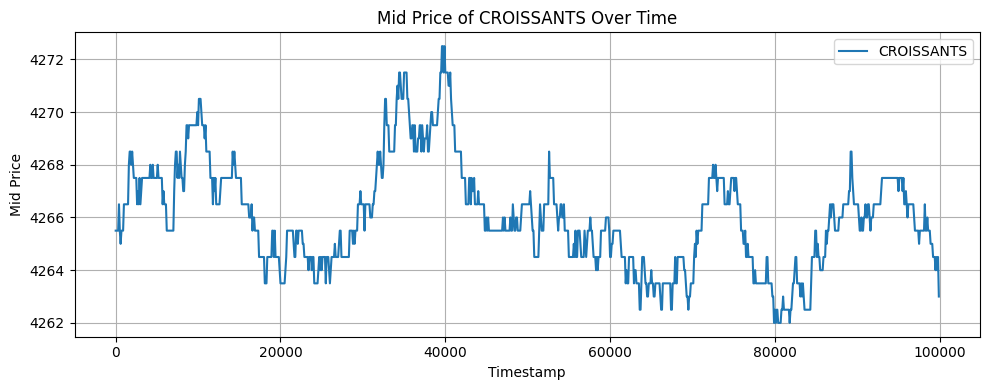

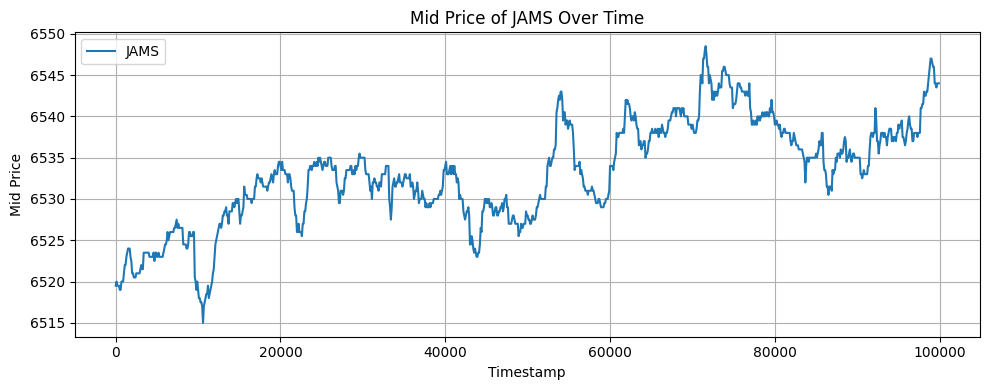

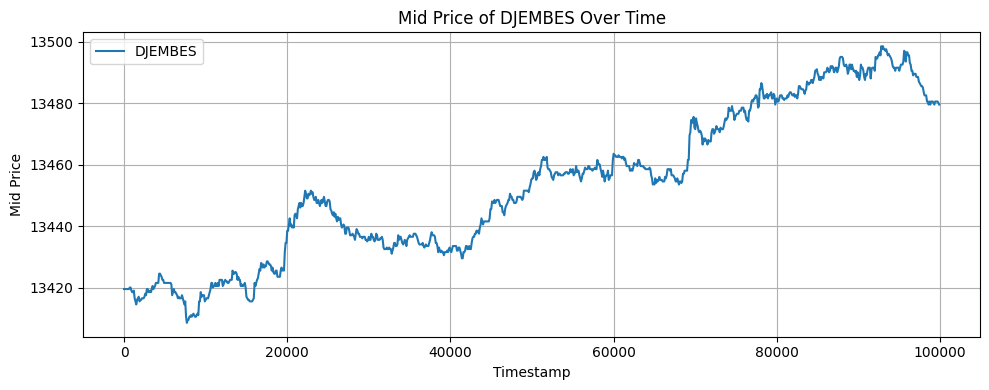

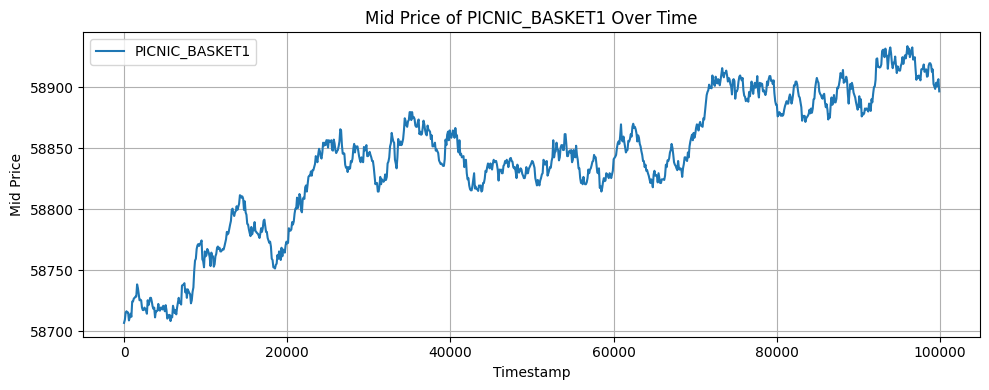

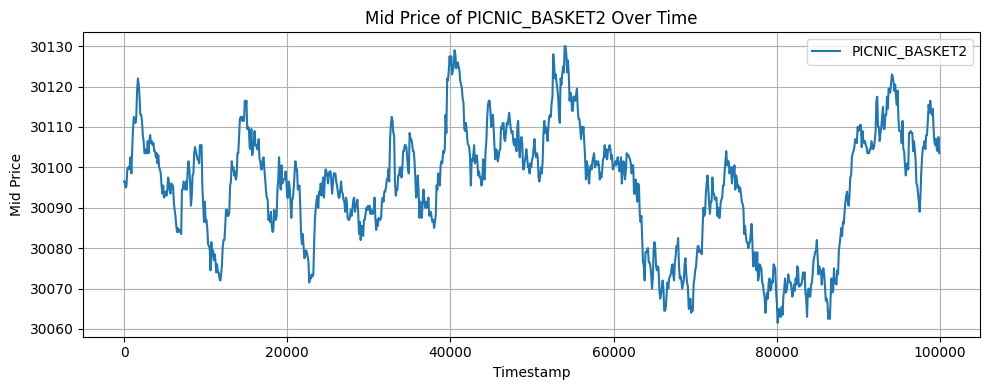

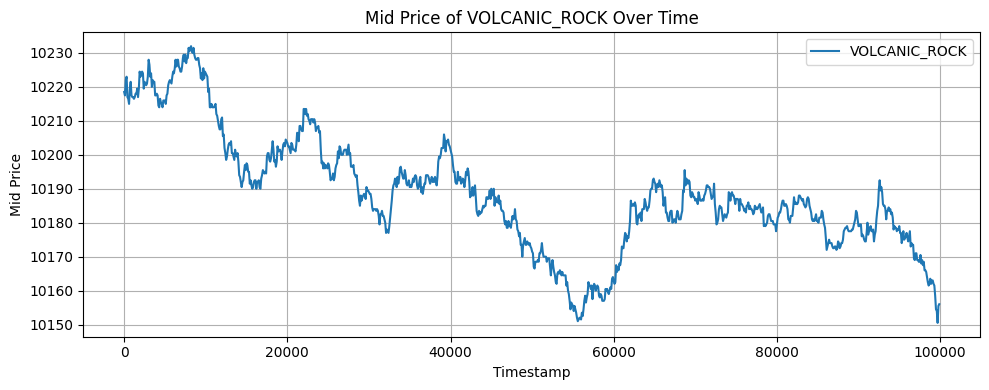

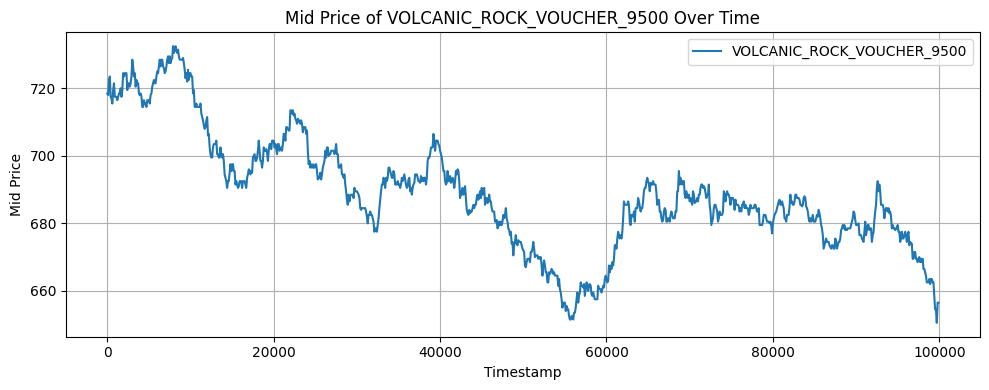

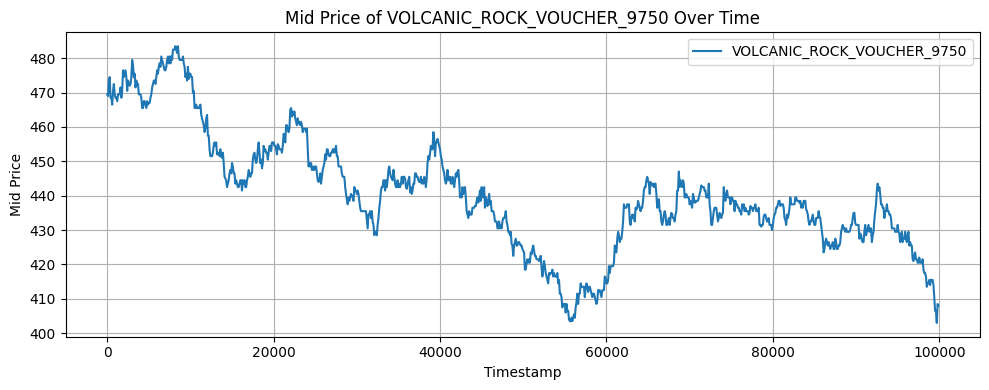

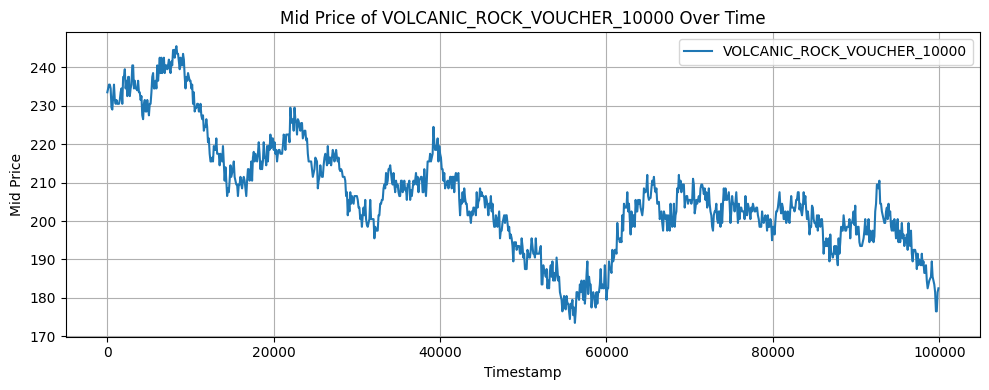

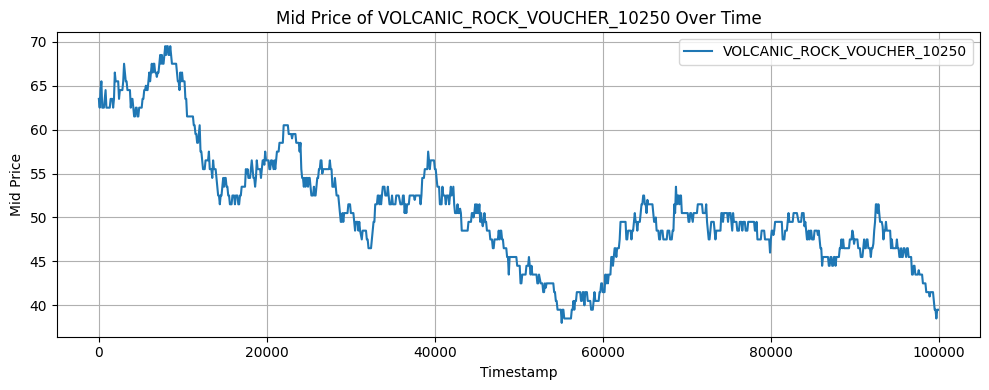

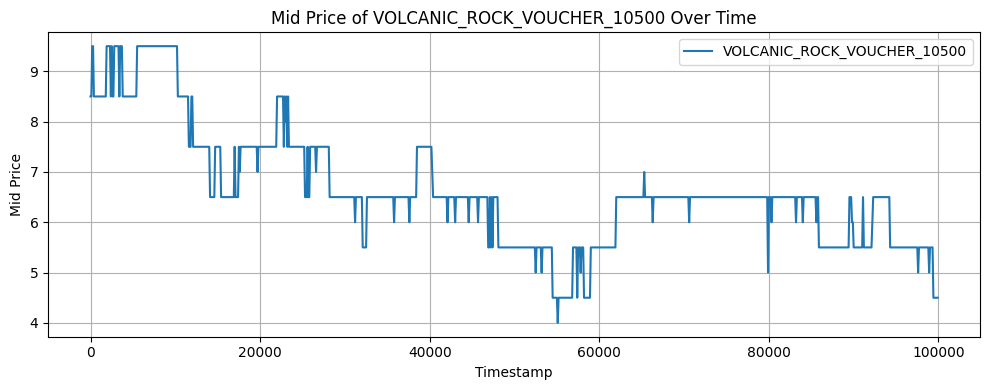

In [21]:
product_names = ["CROISSANTS", "JAMS", "DJEMBES", "PICNIC_BASKET1", "PICNIC_BASKET2", 
                 "VOLCANIC_ROCK", "VOLCANIC_ROCK_VOUCHER_9500", "VOLCANIC_ROCK_VOUCHER_9750", "VOLCANIC_ROCK_VOUCHER_10000",
                 "VOLCANIC_ROCK_VOUCHER_10250", "VOLCANIC_ROCK_VOUCHER_10500"]

# Plot mid-price per product on separate graphs
for product in product_names:
    product_df = df[df["product"] == product]
    plt.figure(figsize=(10, 4))
    plt.plot(product_df["timestamp"], product_df["mid_price"], label=product)
    plt.title(f"Mid Price of {product} Over Time")
    plt.xlabel("Timestamp")
    plt.ylabel("Mid Price")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


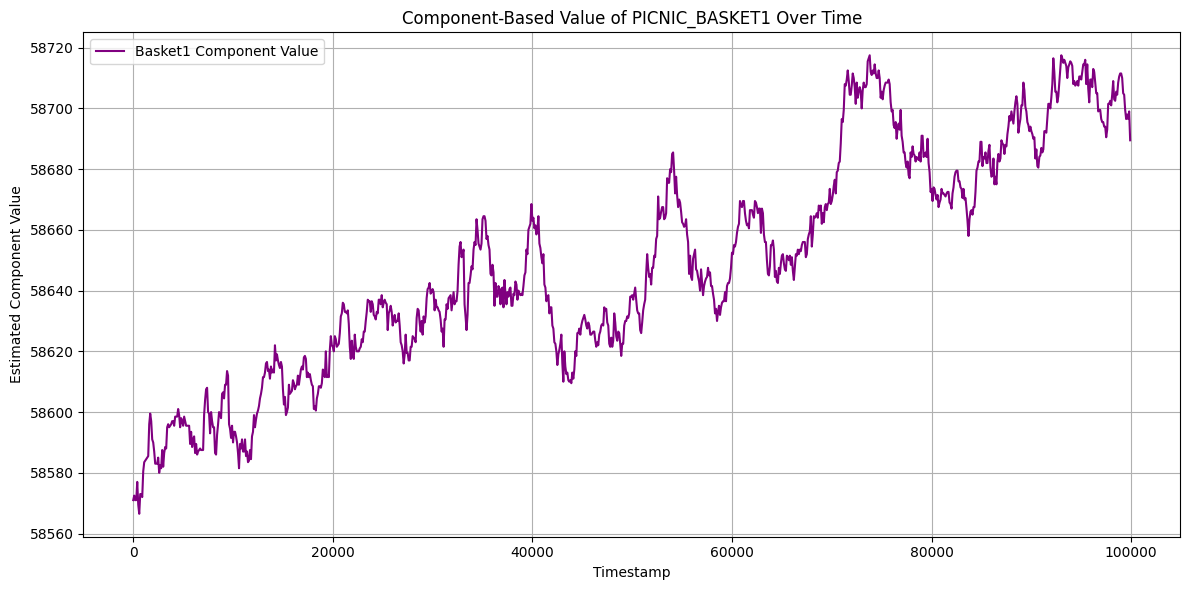

In [22]:
croissant = df[df["product"] == "CROISSANTS"][["timestamp", "mid_price"]].rename(columns={"mid_price": "croissant"})
jam = df[df["product"] == "JAMS"][["timestamp", "mid_price"]].rename(columns={"mid_price": "jam"})
djembe = df[df["product"] == "DJEMBES"][["timestamp", "mid_price"]].rename(columns={"mid_price": "djembe"})

merged = croissant.merge(jam, on="timestamp", how="outer")
merged = merged.merge(djembe, on="timestamp", how="outer")
merged = merged.sort_values("timestamp")
merged.interpolate(method="linear", inplace=True)
merged.dropna(inplace=True)

merged["basket1_component_value"] = 6 * merged["croissant"] + 3 * merged["jam"] + merged["djembe"]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(merged["timestamp"], merged["basket1_component_value"], label="Basket1 Component Value", color="purple")
plt.title("Component-Based Value of PICNIC_BASKET1 Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Estimated Component Value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


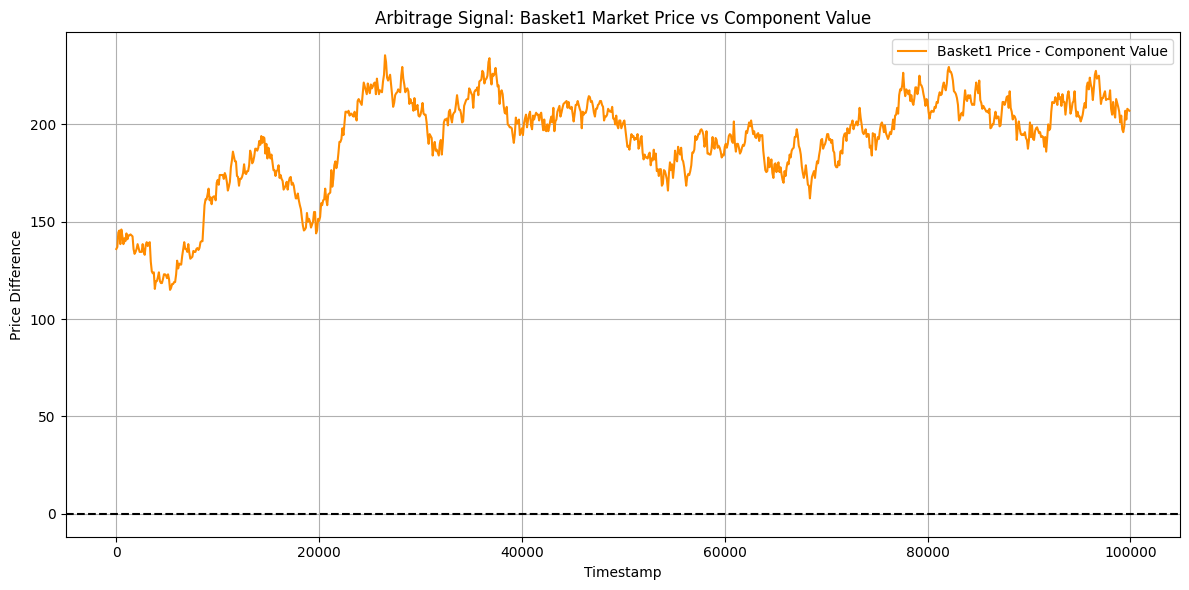

In [23]:
basket1 = df[df["product"] == "PICNIC_BASKET1"][["timestamp", "mid_price"]].rename(columns={"mid_price": "basket1_price"})

comparison = merged.merge(basket1, on="timestamp", how="inner")

comparison["basket1_diff"] = comparison["basket1_price"] - comparison["basket1_component_value"]

plt.figure(figsize=(12, 6))
plt.plot(comparison["timestamp"], comparison["basket1_diff"], label="Basket1 Price - Component Value", color="darkorange")
plt.axhline(0, linestyle="--", color="black")
plt.title("Arbitrage Signal: Basket1 Market Price vs Component Value")
plt.xlabel("Timestamp")
plt.ylabel("Price Difference")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

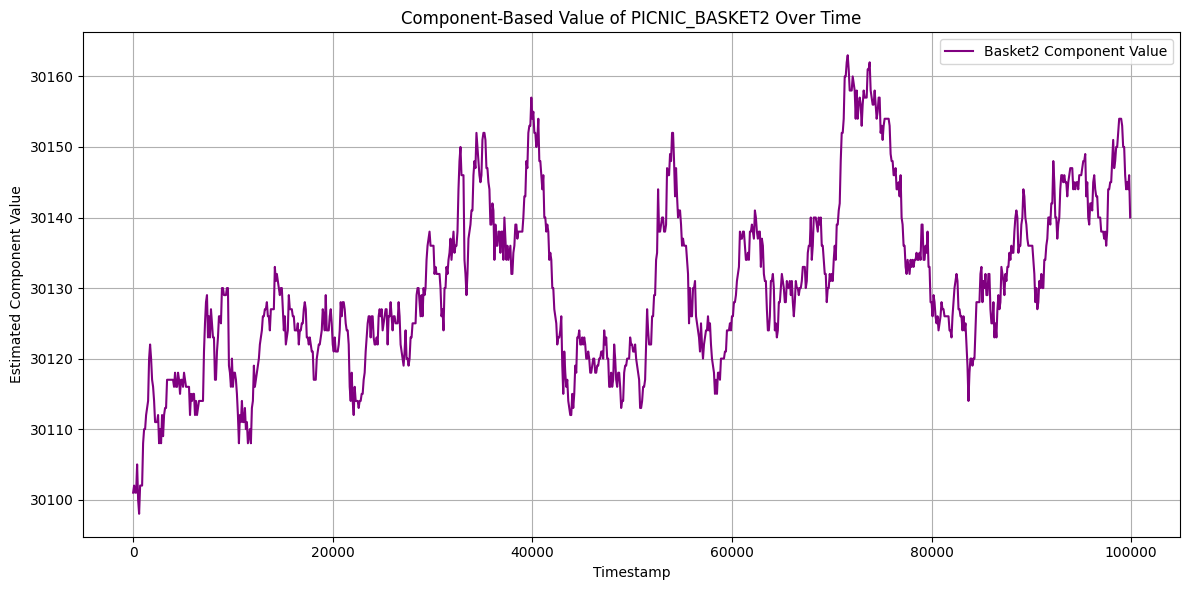

In [24]:
croissant = df[df["product"] == "CROISSANTS"][["timestamp", "mid_price"]].rename(columns={"mid_price": "croissant"})
jam = df[df["product"] == "JAMS"][["timestamp", "mid_price"]].rename(columns={"mid_price": "jam"})

merged = croissant.merge(jam, on="timestamp", how="outer")
merged = merged.sort_values("timestamp")
merged.interpolate(method="linear", inplace=True)
merged.dropna(inplace=True)

merged["basket2_component_value"] = 4 * merged["croissant"] + 2 * merged["jam"]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(merged["timestamp"], merged["basket2_component_value"], label="Basket2 Component Value", color="purple")
plt.title("Component-Based Value of PICNIC_BASKET2 Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Estimated Component Value")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



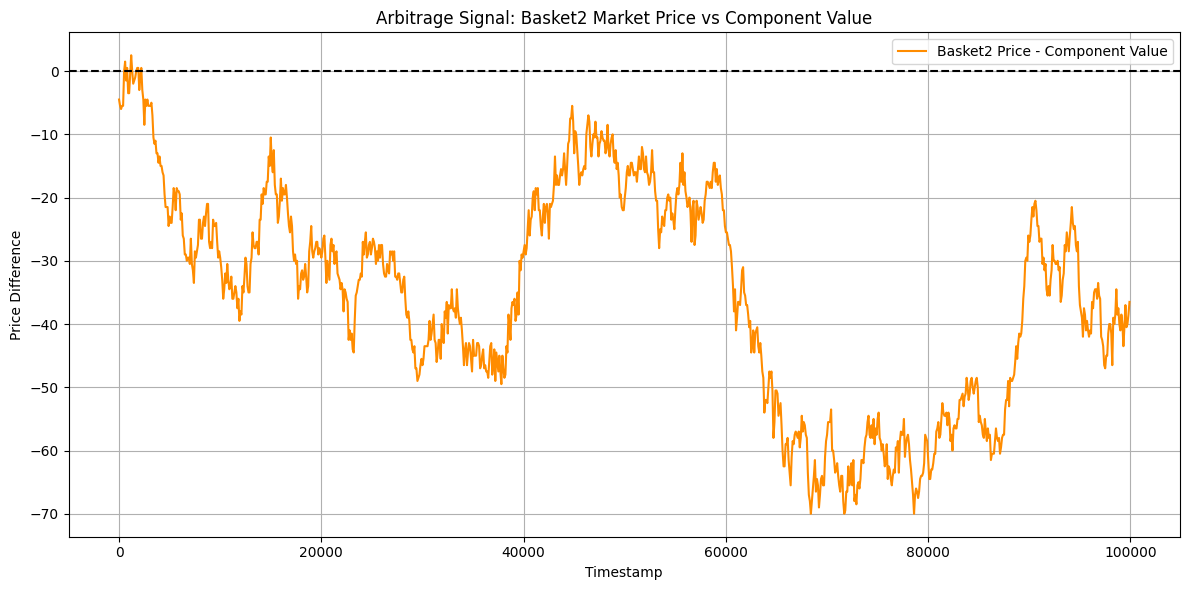

In [25]:
basket2 = df[df["product"] == "PICNIC_BASKET2"][["timestamp", "mid_price"]].rename(columns={"mid_price": "basket2_price"})

comparison = merged.merge(basket2, on="timestamp", how="inner")

comparison["basket2_diff"] = comparison["basket2_price"] - comparison["basket2_component_value"]


# Plot the difference
plt.figure(figsize=(12, 6))
plt.plot(comparison["timestamp"], comparison["basket2_diff"], label="Basket2 Price - Component Value", color="darkorange")



plt.axhline(0, linestyle="--", color="black")
plt.title("Arbitrage Signal: Basket2 Market Price vs Component Value")
plt.xlabel("Timestamp")
plt.ylabel("Price Difference")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



In [30]:
def compute_mismatch(voucher_df, strike):
    merged = voucher_df.merge(
        volcanic_df[["timestamp", "mid_price"]],
        on="timestamp",
        suffixes=("_voucher", "_rock")
    )
    merged["theoretical"] = merged["mid_price_rock"] - strike
    merged["mismatch"] = merged["mid_price_voucher"] - merged["theoretical"]
    return merged[["timestamp", "mid_price_voucher", "mid_price_rock", "theoretical", "mismatch"]]

# Apply to all
df_9500 = compute_mismatch(vol_df_9500, 9500)
df_9750 = compute_mismatch(vol_df_9750, 9750)
df_10000 = compute_mismatch(vol_df_10000, 10000)
df_10250 = compute_mismatch(vol_df_10250, 10250)
df_10500 = compute_mismatch(vol_df_10500, 10500)

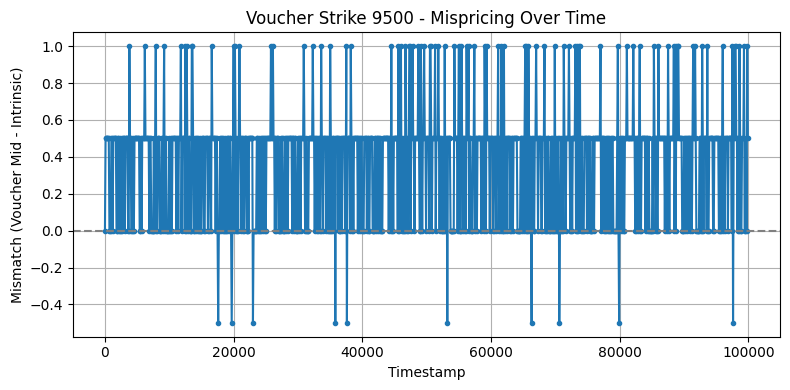

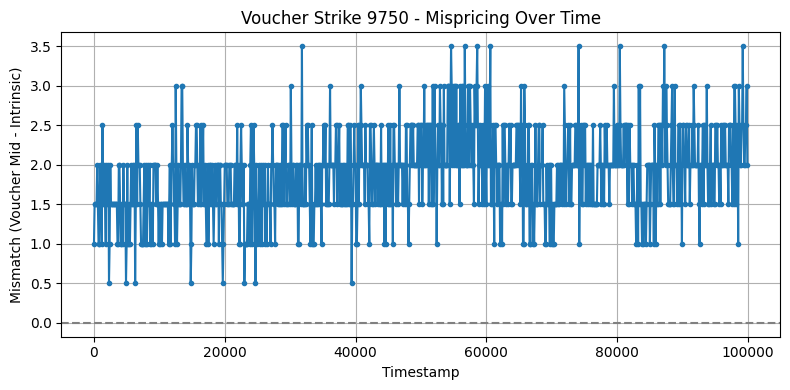

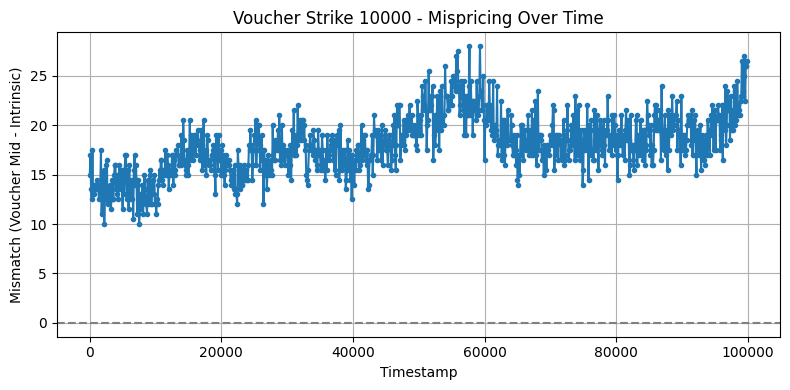

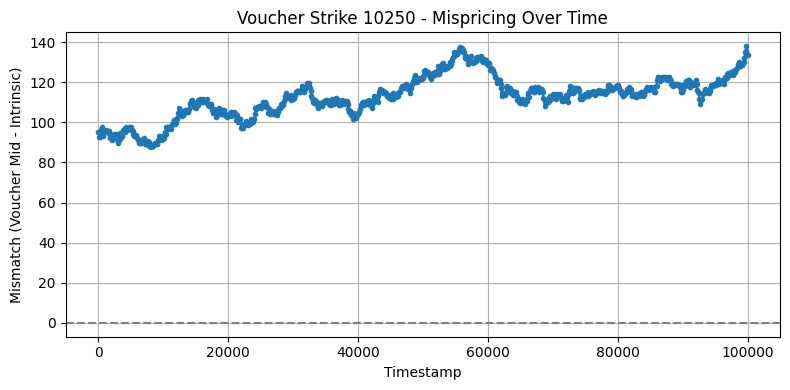

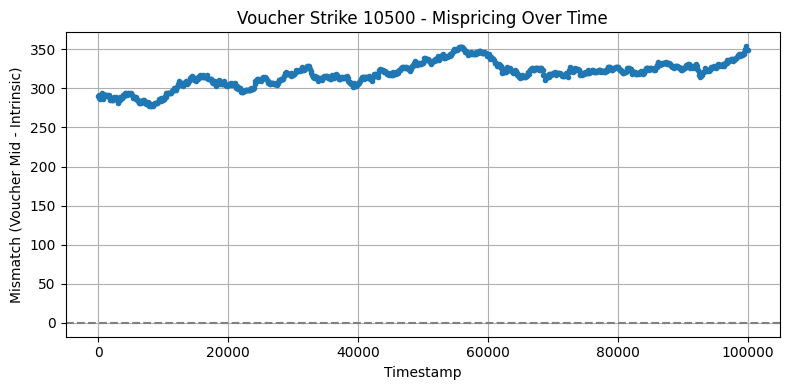

In [31]:
voucher_dfs = [
    ("9500", df_9500),
    ("9750", df_9750),
    ("10000", df_10000),
    ("10250", df_10250),
    ("10500", df_10500)
]
for label, df in voucher_dfs:
    plt.figure(figsize=(8, 4))
    plt.plot(df["timestamp"], df["mismatch"], marker='o', linestyle='-', markersize=3)
    plt.axhline(0, color='gray', linestyle='--')
    plt.title(f"Voucher Strike {label} - Mispricing Over Time")
    plt.xlabel("Timestamp")
    plt.ylabel("Mismatch (Voucher Mid - Intrinsic)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [32]:
def compute_smart_trading_signal(voucher_df, rock_df, strike, window=1000):
    merged = voucher_df.merge(
        rock_df[["timestamp", "mid_price"]],
        on="timestamp",
        suffixes=("_voucher", "_rock")
    )

    merged["intrinsic"] = merged["mid_price_rock"] - strike
    merged["premium"] = merged["mid_price_voucher"] - merged["intrinsic"]

    # Rolling stats for smart signals
    merged["mean_premium"] = merged["premium"].rolling(window).mean()
    merged["std_premium"] = merged["premium"].rolling(window).std()

    # Signal:
    # - buy if premium is more than 1 std below mean
    # - sell if more than 1 std above mean
    merged["signal"] = 0
    merged.loc[merged["premium"] < merged["mean_premium"] - merged["std_premium"], "signal"] = 1
    merged.loc[merged["premium"] > merged["mean_premium"] + merged["std_premium"], "signal"] = -1

    return merged[["timestamp", "mid_price_voucher", "mid_price_rock", "intrinsic", "premium", "mean_premium", "std_premium", "signal"]]


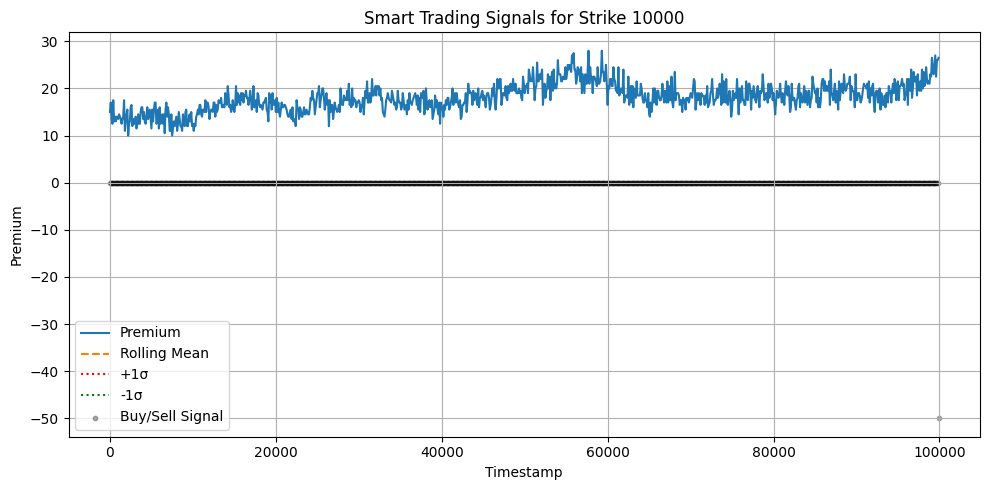

In [33]:
df = compute_smart_trading_signal(vol_df_10000, volcanic_df, 10000)

plt.figure(figsize=(10, 5))
plt.plot(df["timestamp"], df["premium"], label="Premium")
plt.plot(df["timestamp"], df["mean_premium"], label="Rolling Mean", linestyle='--')
plt.plot(df["timestamp"], df["mean_premium"] + df["std_premium"], color='red', linestyle=':', label="+1σ")
plt.plot(df["timestamp"], df["mean_premium"] - df["std_premium"], color='green', linestyle=':', label="-1σ")
plt.scatter(df["timestamp"], df["signal"] * 50, color="black", label="Buy/Sell Signal", alpha=0.3, s=10)
plt.title("Smart Trading Signals for Strike 10000")
plt.xlabel("Timestamp")
plt.ylabel("Premium")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
